In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon_product.csv', header=0)

# 4.1

## 4.1.1

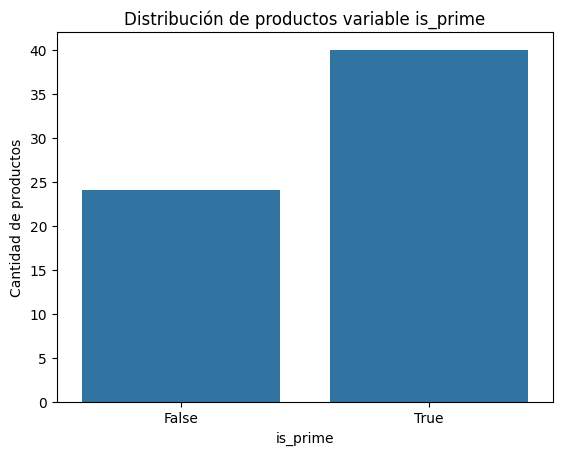

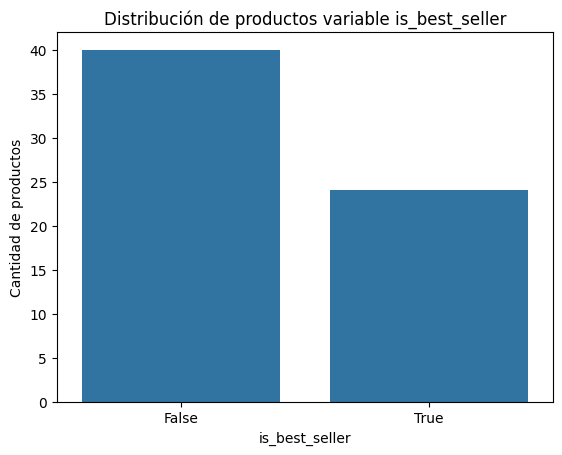

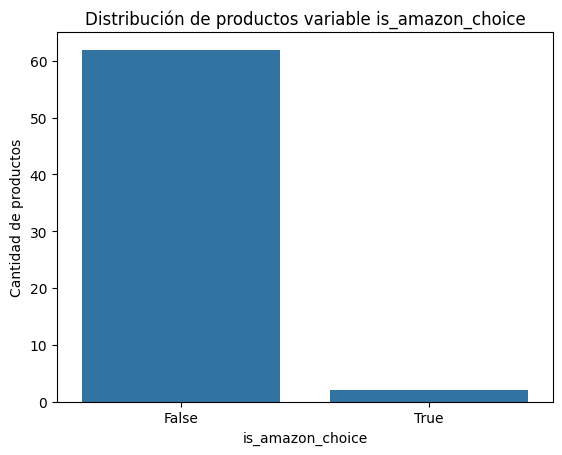

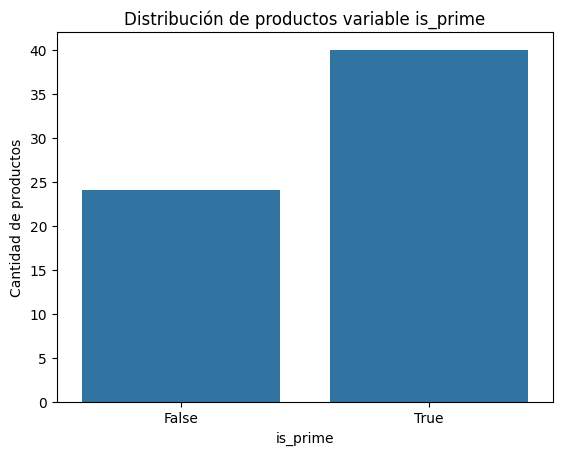

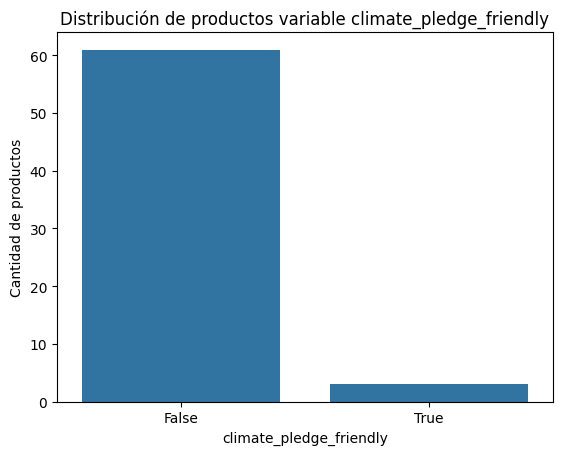

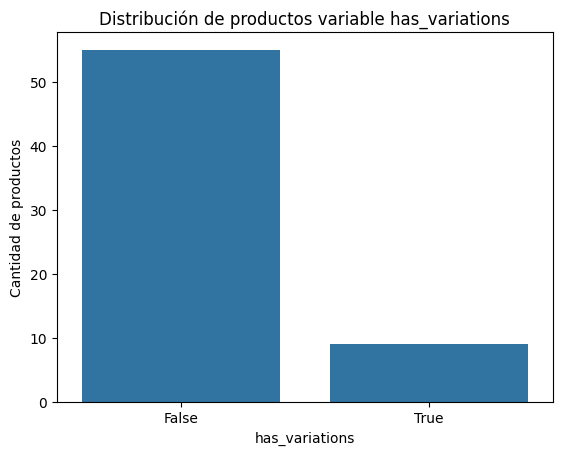

In [2]:
def plot_histogram(df, column_name):
    sns.countplot(x=column_name, data=df)
    plt.title(f'Distribución de productos variable {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Cantidad de productos')
    plt.show()

for column in ['is_prime', 'is_best_seller', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 'has_variations']:
    plot_histogram(df.dropna(subset=column, inplace=False), column)

## 4.1.2

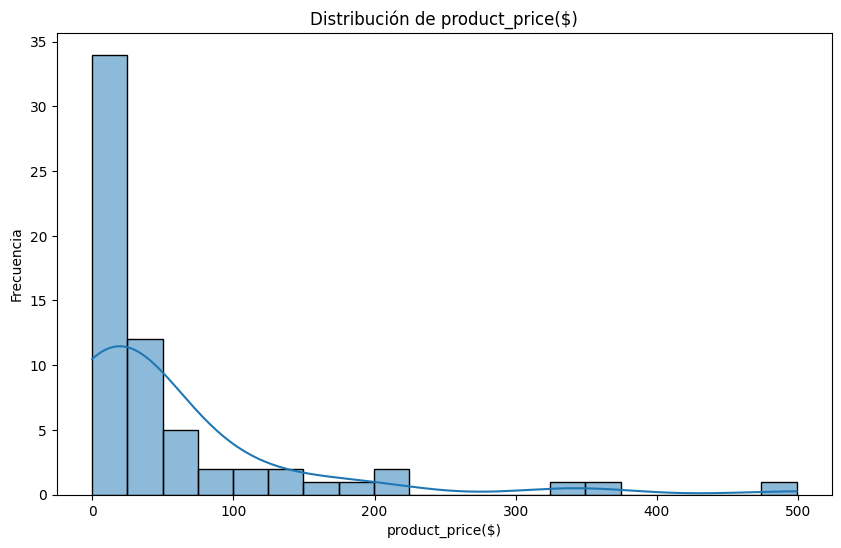

Series([], Name: product_title, dtype: object)


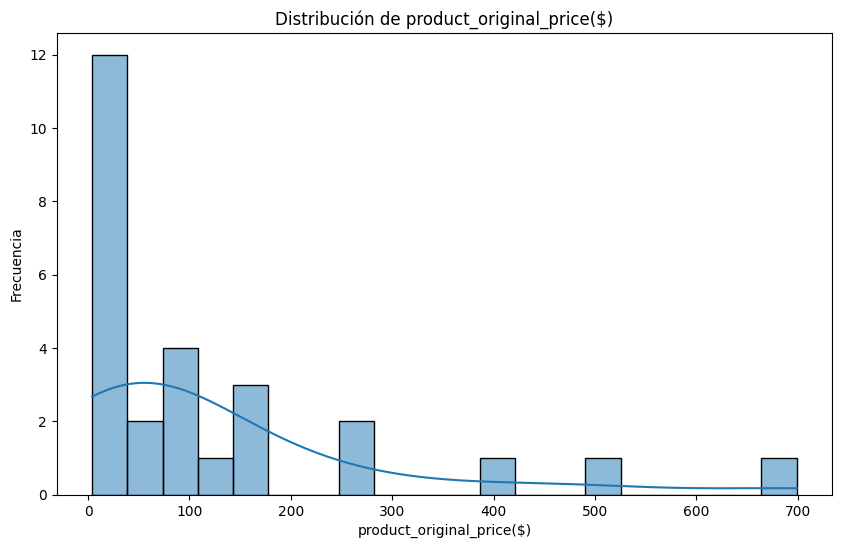

Series([], Name: product_title, dtype: object)


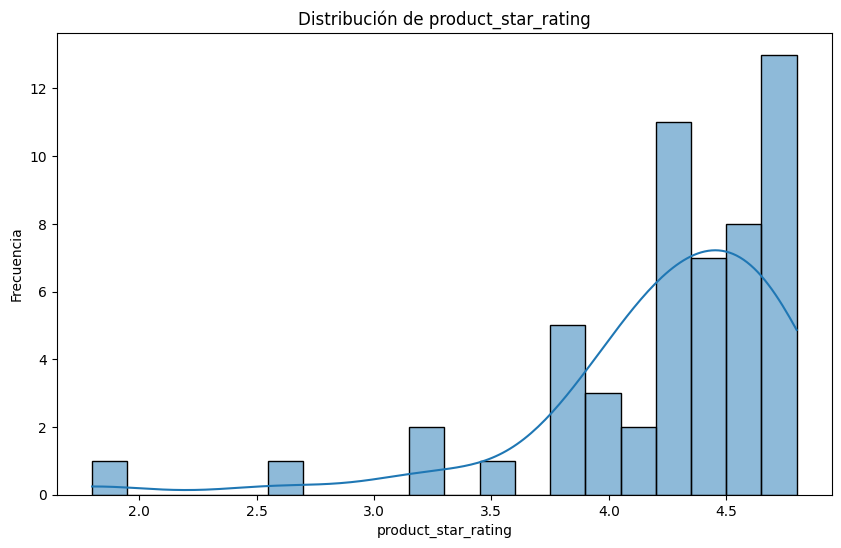

Series([], Name: product_title, dtype: object)


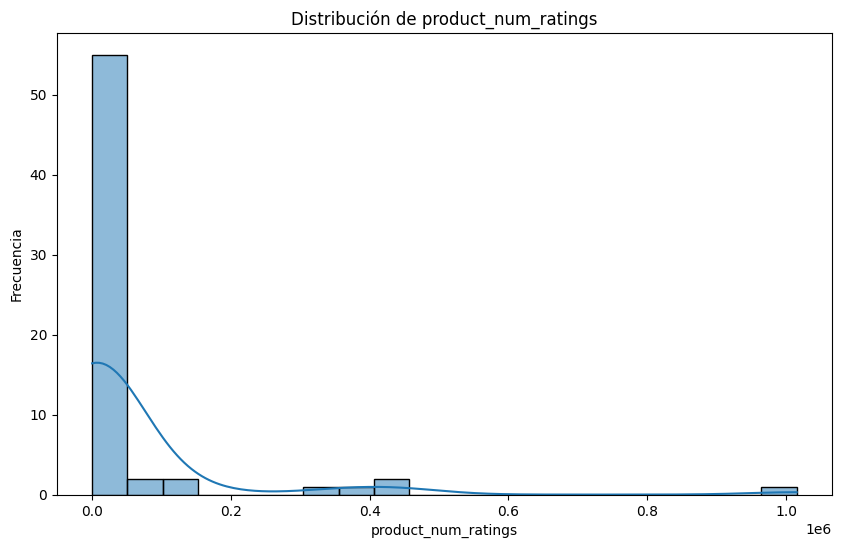

55    Disney+
Name: product_title, dtype: object


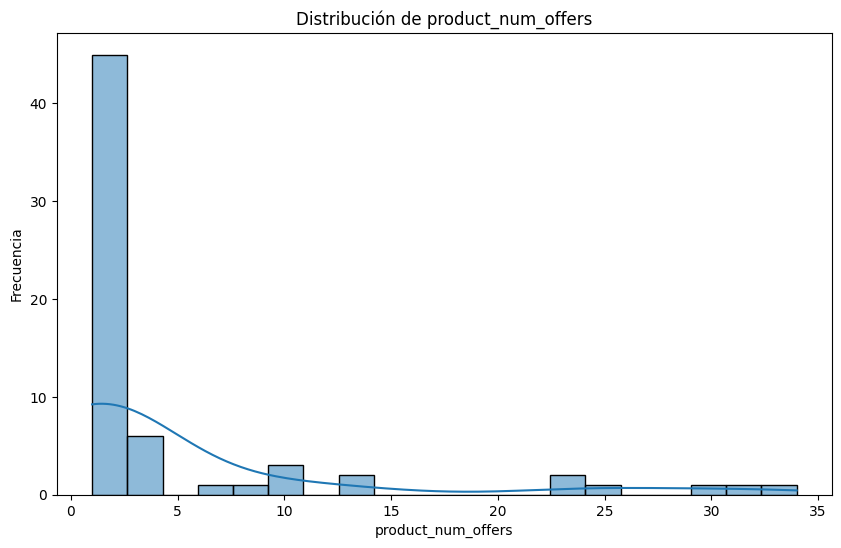

Series([], Name: product_title, dtype: object)


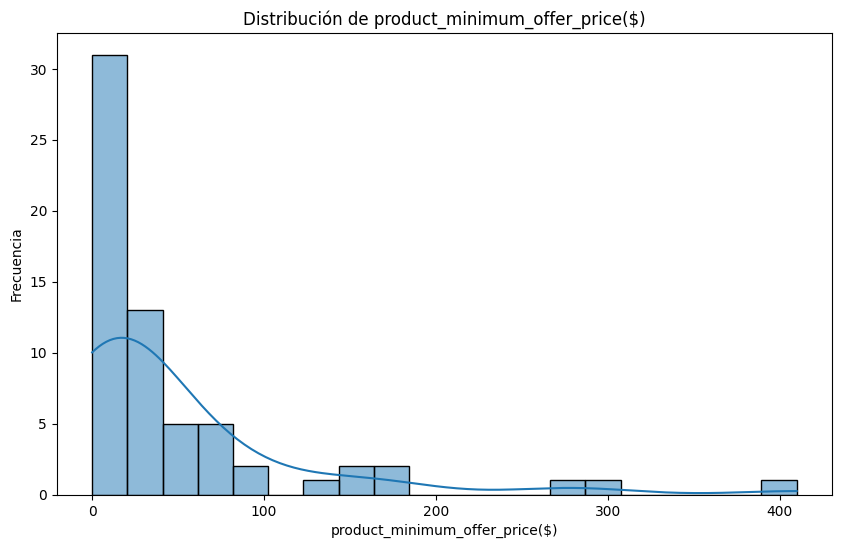

Series([], Name: product_title, dtype: object)


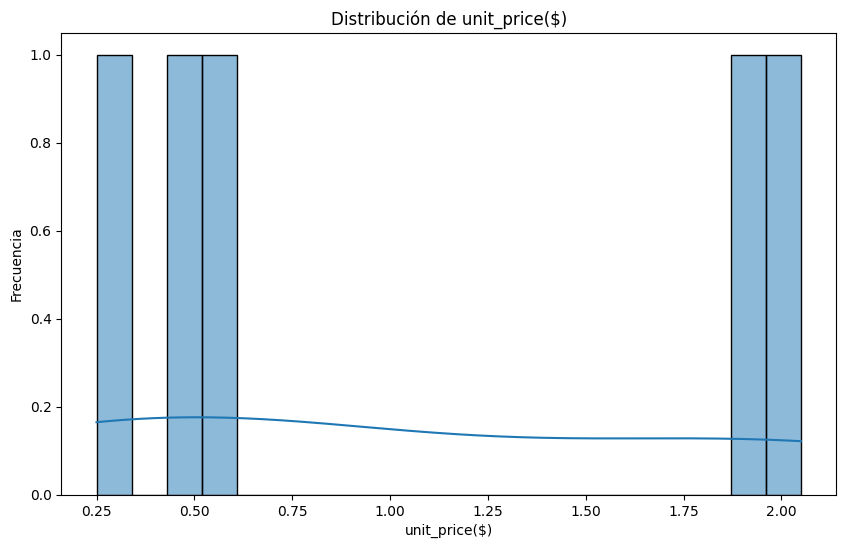

Series([], Name: product_title, dtype: object)


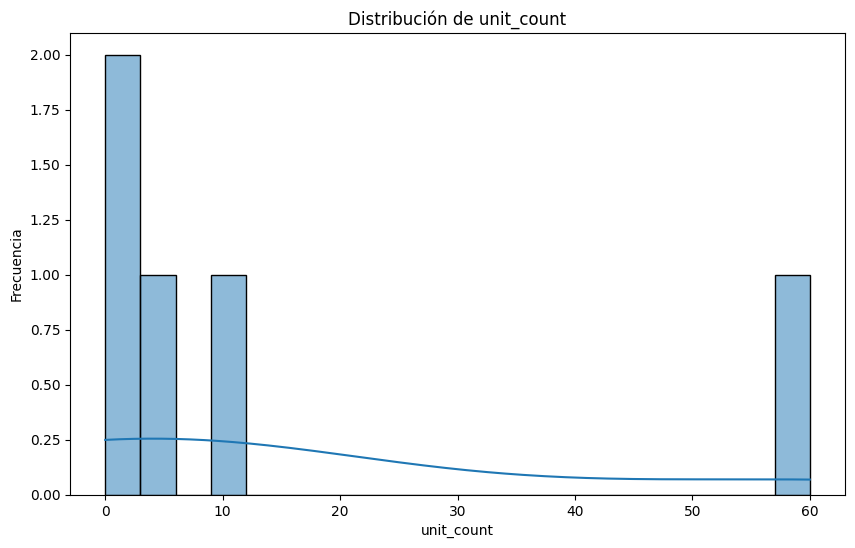

Series([], Name: product_title, dtype: object)


In [3]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True, bins=20)
    plt.title(f'Distribución de {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.show()
    
def find_outliers(df, column_name, num_std=5):
    mean = df[column_name].mean()
    std = df[column_name].std()
    
    lower_bound = mean - num_std * std
    upper_bound = mean + num_std * std
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    return outliers['product_title']

for column in ['product_price($)', 'product_original_price($)', 'product_star_rating', 'product_num_ratings', 'product_num_offers', 'product_minimum_offer_price($)', 'unit_price($)', 'unit_count']:
    plot_boxplot(df.dropna(subset=column, inplace=False), column)
    print(find_outliers(df, column))

# 4.2

## 4.2.1

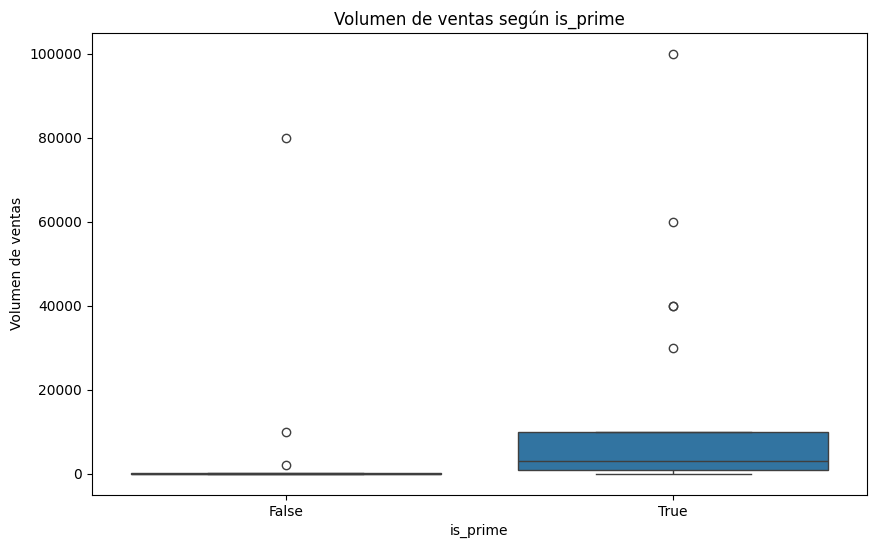

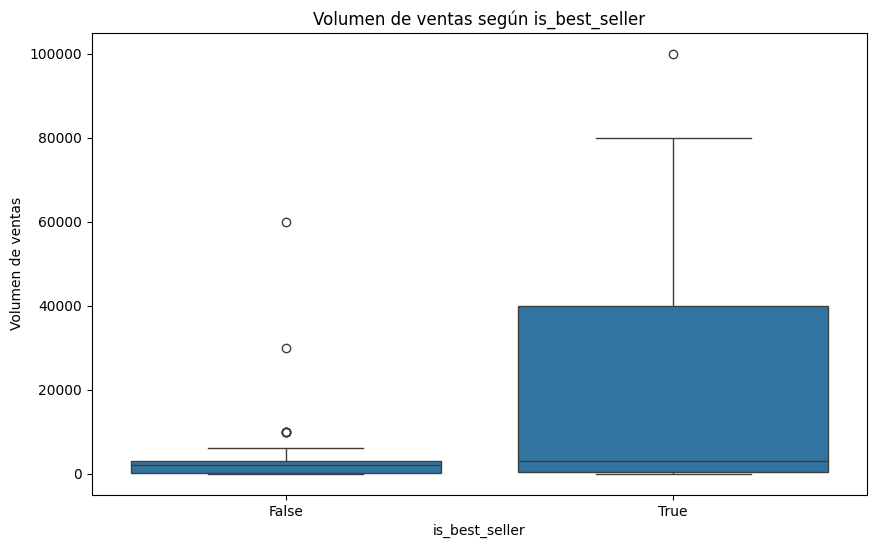

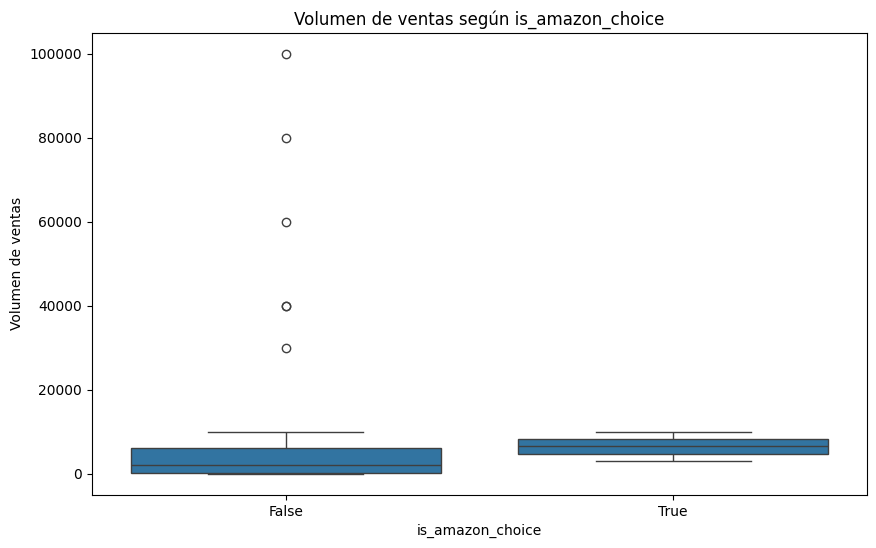

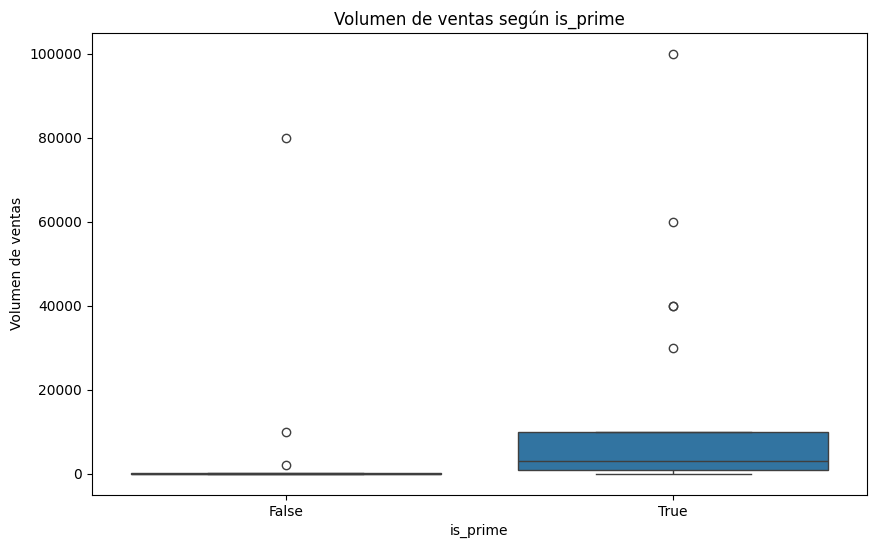

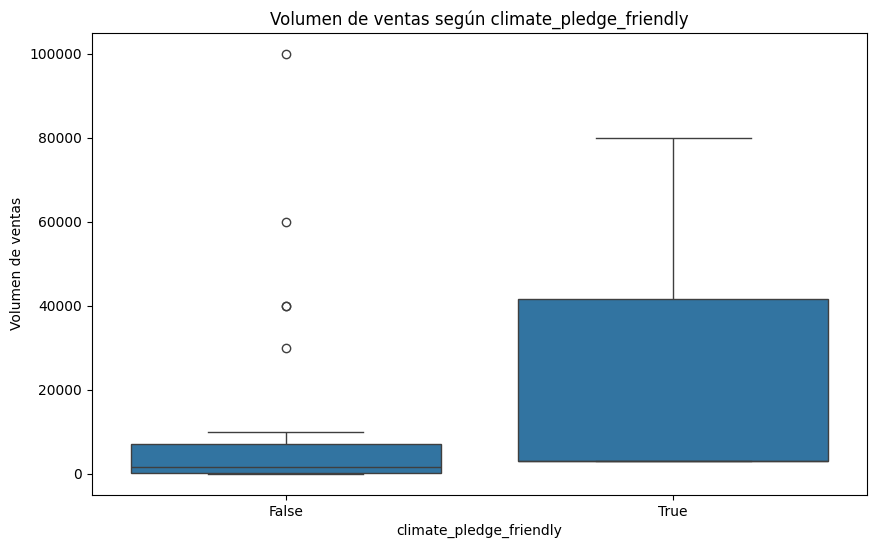

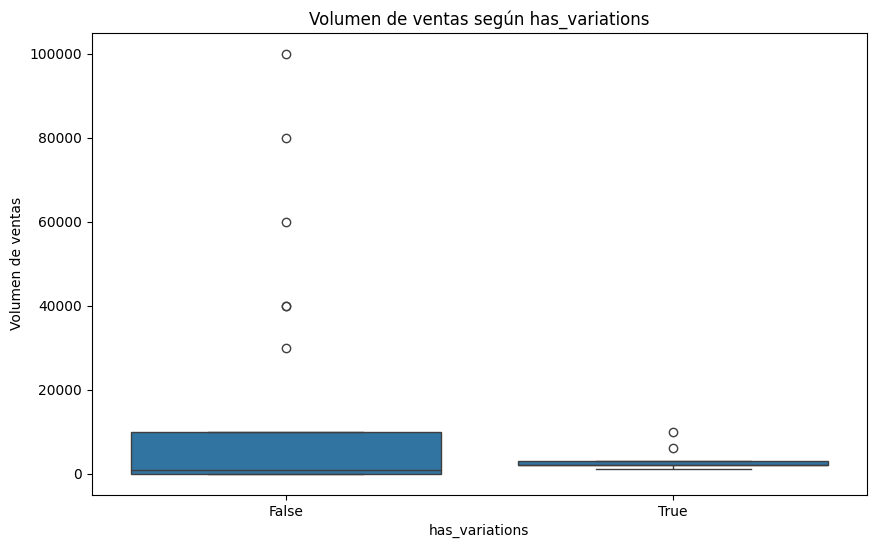

In [4]:
# Limpiar la columna sales_volume
df['sales_volume_clear'] = df['sales_volume'].str.replace('K+', '000').str.replace('M+', '000000').str.extract(r'(\d+)').astype(float)

def plot_boxplot(df, column_name):
    df.dropna(subset='sales_volume_clear', inplace=False)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='sales_volume_clear', data=df)
    plt.title(f'Volumen de ventas según {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Volumen de ventas')
    plt.show()

for column in ['is_prime', 'is_best_seller', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 'has_variations']:
    plot_boxplot(df.dropna(subset=column, inplace=False), column)


## 4.2.2

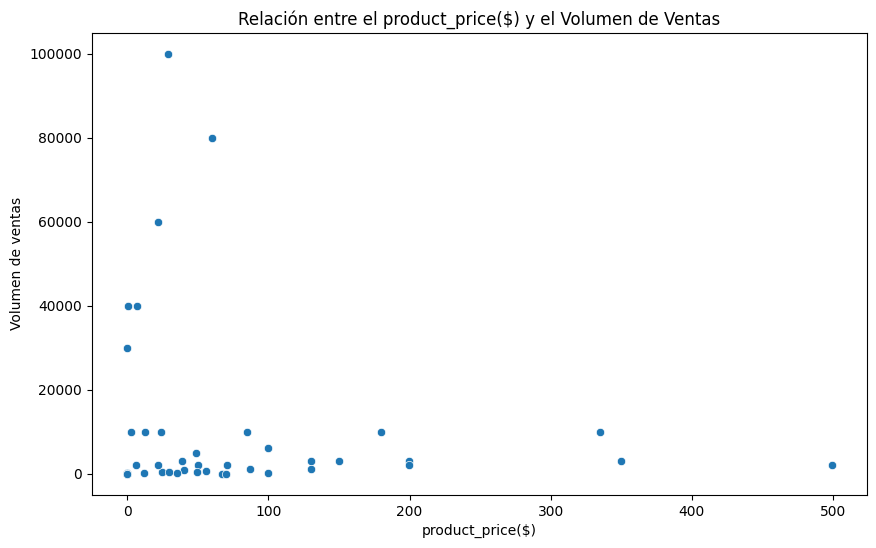

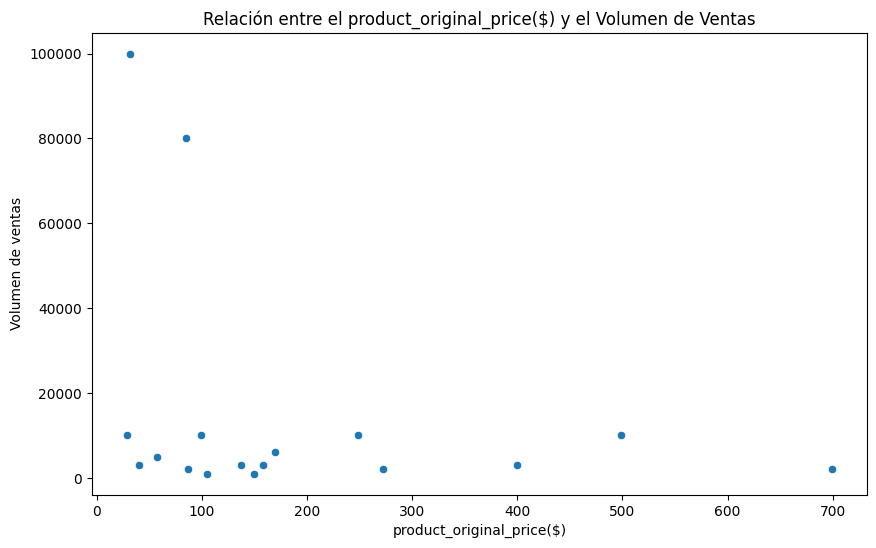

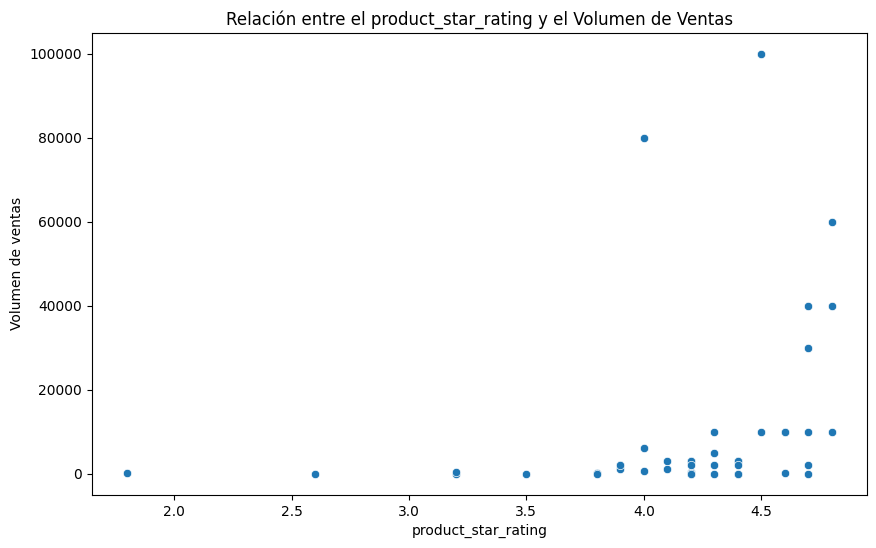

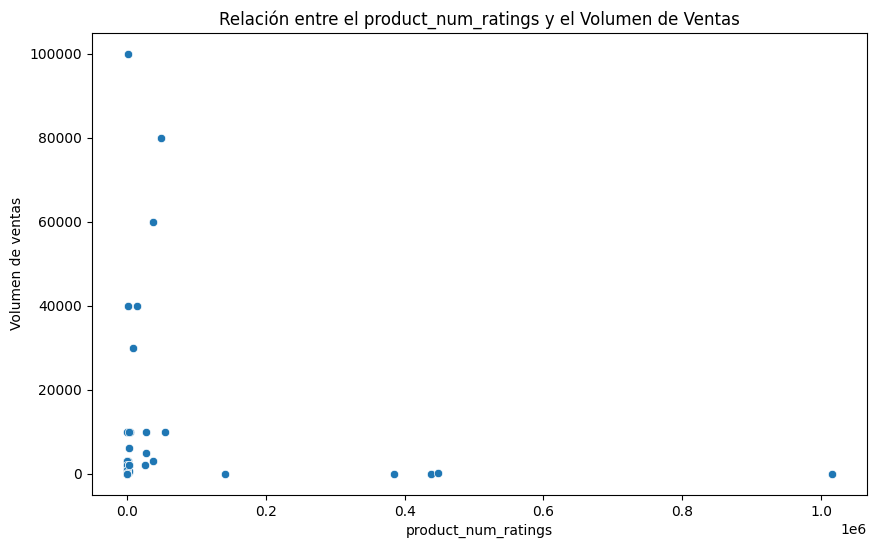

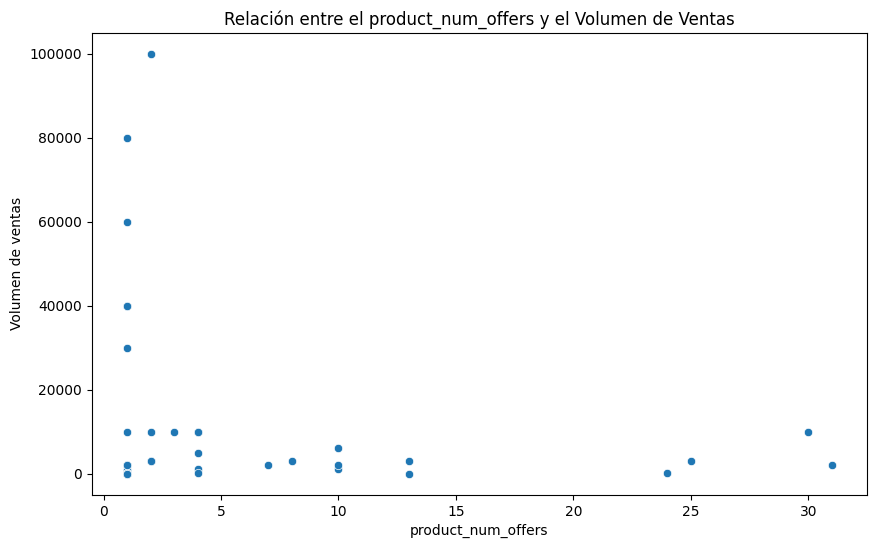

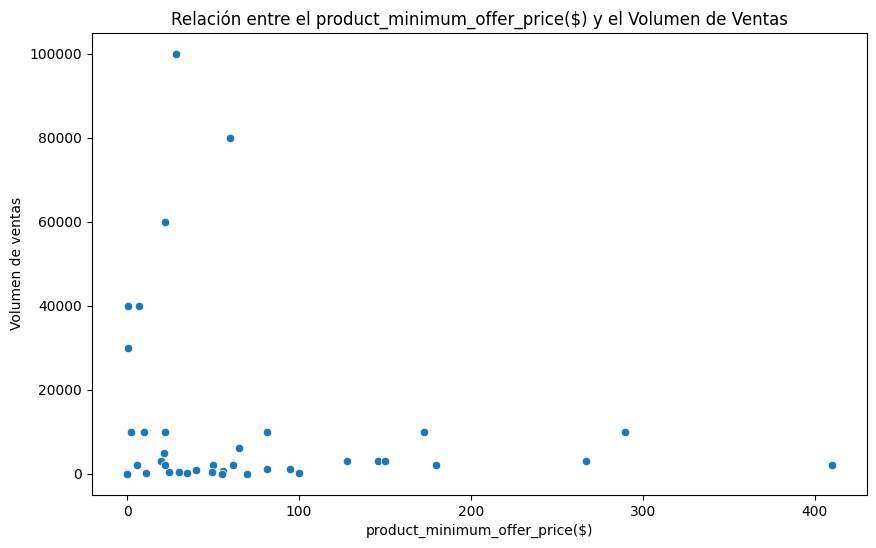

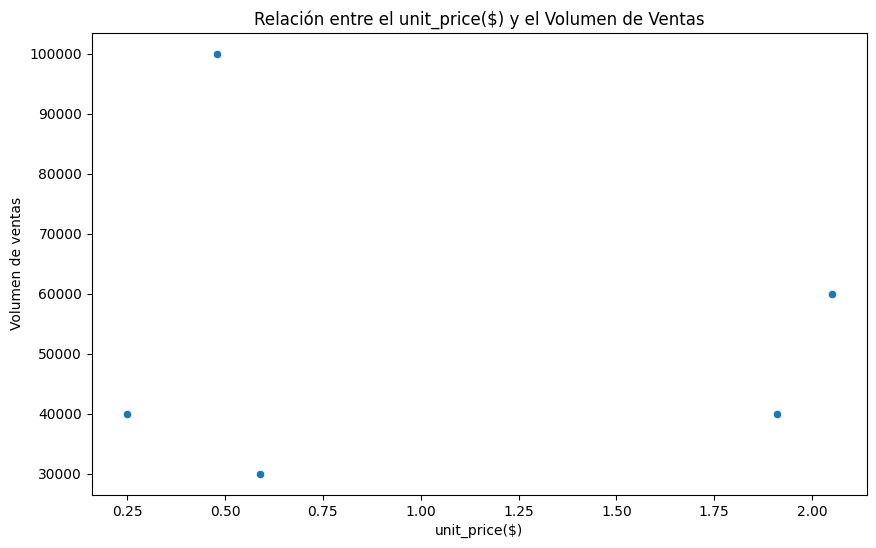

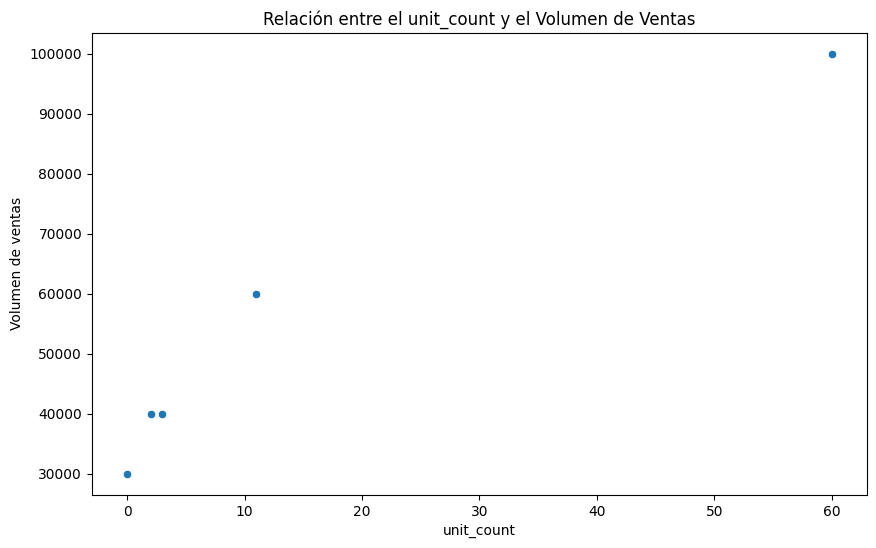

In [5]:
def plot_scatterplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y='sales_volume_clear', data=df)
    plt.title(f'Relación entre el {column} y el Volumen de Ventas')
    plt.xlabel(column)
    plt.ylabel('Volumen de ventas')
    plt.show()
    
for column in ['product_price($)', 'product_original_price($)', 'product_star_rating', 'product_num_ratings', 'product_num_offers', 'product_minimum_offer_price($)', 'unit_price($)', 'unit_count']:
    plot_scatterplot(df.dropna(subset=column, inplace=False), column)

# 4.3

## 4.3.1

In [6]:
df_numeric = df[['product_price($)', 'product_original_price($)', 'product_star_rating', 'product_num_ratings', 'product_num_offers', 'product_minimum_offer_price($)', 'unit_price($)', 'unit_count', 'sales_volume_clear']]

# Crear la matriz de correlación
corr_matrix = df_numeric.corr()

corr_matrix

,product_price($),product_original_price($),product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price($),unit_price($),unit_count,sales_volume_clear
product_price($),1.000000,0.989061,-0.044971,-0.190693,0.276812,0.993766,0.238654,0.831991,-0.108648
product_original_price($),0.989061,1.000000,-0.265784,-0.232485,0.171946,0.983522,NaN,NaN,-0.279153
product_star_rating,-0.044971,-0.265784,1.000000,0.125740,0.001253,-0.053988,0.320362,-0.860200,0.273221
product_num_ratings,-0.190693,-0.232485,0.125740,1.000000,-0.103248,-0.200342,0.429801,-0.273278,-0.105430
product_num_offers,0.276812,0.171946,0.001253,-0.103248,1.000000,0.274725,-0.377129,0.986334,-0.141018
product_minimum_offer_price($),0.993766,0.983522,-0.053988,-0.200342,0.274725,1.000000,0.244161,0.828198,-0.098869
unit_price($),0.238654,NaN,0.320362,0.429801,-0.377129,0.244161,1.000000,-0.261499,-0.105052
unit_count,0.831991,NaN,-0.860200,-0.273278,0.986334,0.828198,-0.261499,1.000000,0.971612
sales_volume_clear,-0.108648,-0.279153,0.273221,-0.105430,-0.141018,-0.098869,-0.105052,0.971612,1.000000


## 4.3.2

In [7]:
for column in ['is_prime', 'is_best_seller', 'is_amazon_choice', 'is_prime', 'climate_pledge_friendly', 'has_variations']:
    dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummy], axis=1)
    
df_dummy = df[['is_prime_True','is_prime_False','is_best_seller_False','is_best_seller_True','is_amazon_choice_False','is_amazon_choice_True','is_prime_False','is_prime_True','climate_pledge_friendly_False','climate_pledge_friendly_True','has_variations_False','has_variations_True', 'sales_volume_clear']]

# Crear la matriz de correlación
corr_matrix = df_dummy.corr()

corr_matrix

,is_prime_True,is_prime_True,is_prime_False,is_prime_False,is_best_seller_False,is_best_seller_True,is_amazon_choice_False,is_amazon_choice_True,is_prime_False,is_prime_False,is_prime_True,is_prime_True,climate_pledge_friendly_False,climate_pledge_friendly_True,has_variations_False,has_variations_True,sales_volume_clear
is_prime_True,1.000000,1.000000,-1.000000,-1.000000,0.066667,-0.066667,-0.139122,0.139122,-1.000000,-1.000000,1.000000,1.000000,-0.019087,0.019087,-0.220498,0.220498,0.114889
is_prime_True,1.000000,1.000000,-1.000000,-1.000000,0.066667,-0.066667,-0.139122,0.139122,-1.000000,-1.000000,1.000000,1.000000,-0.019087,0.019087,-0.220498,0.220498,0.114889
is_prime_False,-1.000000,-1.000000,1.000000,1.000000,-0.066667,0.066667,0.139122,-0.139122,1.000000,1.000000,-1.000000,-1.000000,0.019087,-0.019087,0.220498,-0.220498,-0.114889
is_prime_False,-1.000000,-1.000000,1.000000,1.000000,-0.066667,0.066667,0.139122,-0.139122,1.000000,1.000000,-1.000000,-1.000000,0.019087,-0.019087,0.220498,-0.220498,-0.114889
is_best_seller_False,0.066667,0.066667,-0.066667,-0.066667,1.000000,-1.000000,-0.139122,0.139122,-0.066667,-0.066667,0.066667,0.066667,-0.019087,0.019087,-0.313340,0.313340,-0.377410
is_best_seller_True,-0.066667,-0.066667,0.066667,0.066667,-1.000000,1.000000,0.139122,-0.139122,0.066667,0.066667,-0.066667,-0.066667,0.019087,-0.019087,0.313340,-0.313340,0.377410
is_amazon_choice_False,-0.139122,-0.139122,0.139122,0.139122,-0.139122,0.139122,1.000000,-1.000000,0.139122,0.139122,-0.139122,-0.139122,-0.039830,0.039830,-0.072654,0.072654,0.031850
is_amazon_choice_True,0.139122,0.139122,-0.139122,-0.139122,0.139122,-0.139122,-1.000000,1.000000,-0.139122,-0.139122,0.139122,0.139122,0.039830,-0.039830,0.072654,-0.072654,-0.031850
is_prime_False,-1.000000,-1.000000,1.000000,1.000000,-0.066667,0.066667,0.139122,-0.139122,1.000000,1.000000,-1.000000,-1.000000,0.019087,-0.019087,0.220498,-0.220498,-0.114889
is_prime_False,-1.000000,-1.000000,1.000000,1.000000,-0.066667,0.066667,0.139122,-0.139122,1.000000,1.000000,-1.000000,-1.000000,0.019087,-0.019087,0.220498,-0.220498,-0.114889
